In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Set display options for pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\User\Documents\NDSIC\Deploy\House\mobile_dataset_30may.csv')

# Display the first few rows of the dataset
df.head()

(434, 19)


In [4]:
# Display the size of the dataset
print("Size of the dataset")
print(df.shape)

# List the column names
print("Name of the varialeinthe dataset")
print(df.columns.values)

# Get more information about the data
print("Information")
print(df.info())


(434, 19)
['Brand' 'Model' 'Year' 'RAM' 'Weight' 'SIM' 'Internal_Memory'
 'Average_Price' 'Age' 'Camera' 'Battery' 'Launching_Price' 'Warranty'
 'Repaired' 'Scratches' 'Assesories' 'BOX' 'Condition' 'Used_Price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            434 non-null    object 
 1   Model            434 non-null    object 
 2   Year             434 non-null    int64  
 3   RAM              434 non-null    float64
 4   Weight           434 non-null    int64  
 5   SIM              434 non-null    object 
 6   Internal_Memory  434 non-null    int64  
 7   Average_Price    434 non-null    object 
 8   Age              434 non-null    int64  
 9   Camera           434 non-null    object 
 10  Battery          434 non-null    object 
 11  Launching_Price  434 non-null    object 
 12  Warranty         434 non-null    

In [5]:
# Describe all numerical columns
df.describe(exclude=['O'])

,Year,RAM,Weight,Internal_Memory,Age,Warranty,Repaired,Scratches,Assesories,BOX,Condition,Used_Price
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.0,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,2019.232719,1441.398618,187.990783,116.129032,2.725806,0.0,0.532258,0.493088,0.502304,0.472350,0.353687,212.459677
std,1.872060,7878.357534,52.097838,98.410377,1.983984,0.0,0.499534,0.500529,0.500572,0.499811,0.450709,183.108056
min,2010.000000,0.500000,112.000000,8.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,2018.000000,4.000000,165.000000,64.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000
50%,2019.000000,4.000000,180.000000,128.000000,2.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,152.000000
75%,2020.000000,8.000000,192.750000,128.000000,4.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,281.250000
max,2023.000000,45150.000000,575.000000,512.000000,11.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,949.000000


In [6]:
# Describe all categorical columns
df.describe(include=['O'])

,Brand,Model,SIM,Average_Price,Camera,Battery,Launching_Price
count,434,434,434,434,434,434,434
unique,24,335,9,79,92,93,42
top,Samsung,Blade V2021,Dual,150,"12 MP (rear), 8 MP (front)",4000,200
freq,99,7,251,23,29,91,43


<Figure size 1000x600 with 0 Axes>

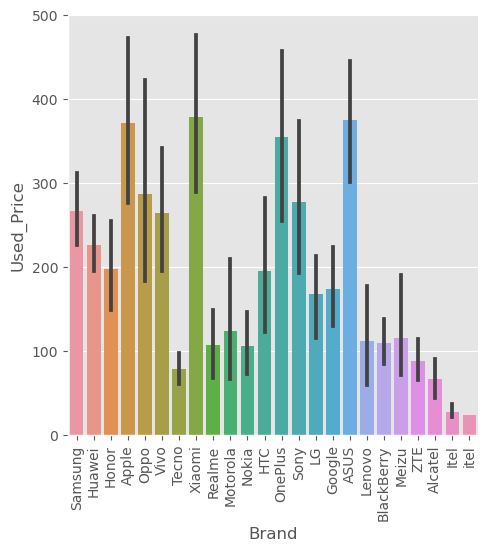

In [7]:
# Plotting Brand vs Used_Price using seaborn
plt.figure(figsize=(10, 6))
sns.catplot(x="Brand", y="Used_Price", data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

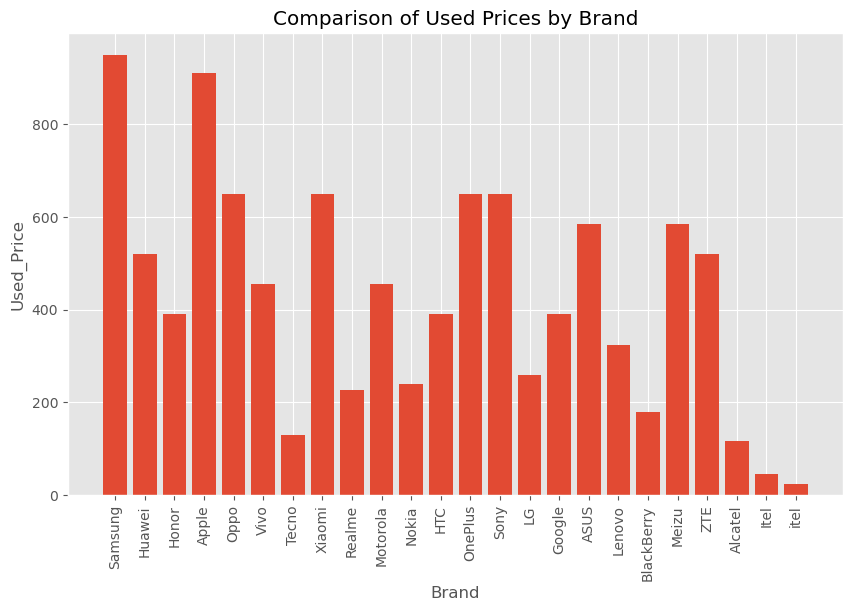

In [8]:
# Plotting Brand vs Used_Price using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df['Brand'], df['Used_Price'])
plt.xlabel('Brand')
plt.ylabel('Used_Price')
plt.title('Comparison of Used Prices by Brand')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

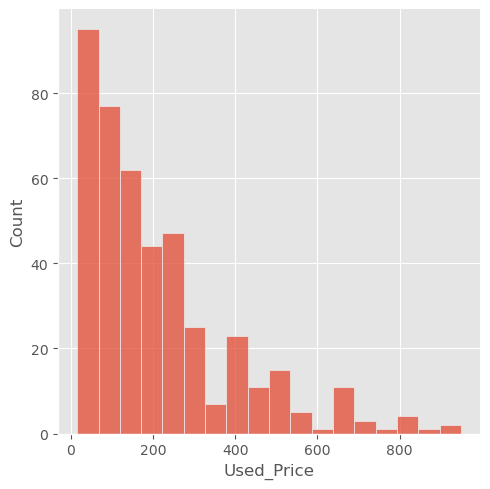

In [9]:
# Plotting distribution of Used_Price
plt.figure(figsize=(10, 6))
sns.displot(df['Used_Price'])

In [10]:
# Map Condition values to categories
condition_mapping = {1: 'good', 0.5: 'fair', 0: 'poor'}
df['Condition'] = df['Condition'].map(condition_mapping).astype('category')

# Select categorical columns to apply label encoding
categorical_columns = ['Brand', 'Model', 'SIM', 'Average_Price', 'Camera', 'Condition']

# Apply label encoding to the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Convert RAM column to numeric
df["RAM"] = pd.to_numeric(df["RAM"])

In [16]:
# Try to convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for columns with NaN values (indicating conversion errors)
non_numeric_columns = df.columns[df.isna().any()].tolist()

# Replace non-numeric values (e.g., '-') with 0
df[non_numeric_columns] = df[non_numeric_columns].replace('-', 0)

# Fill NaN values with the mean of each column (or you could use another strategy like median or mode)
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mean())

# Print the columns with non-numeric values
print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['Battery', 'Launching_Price']


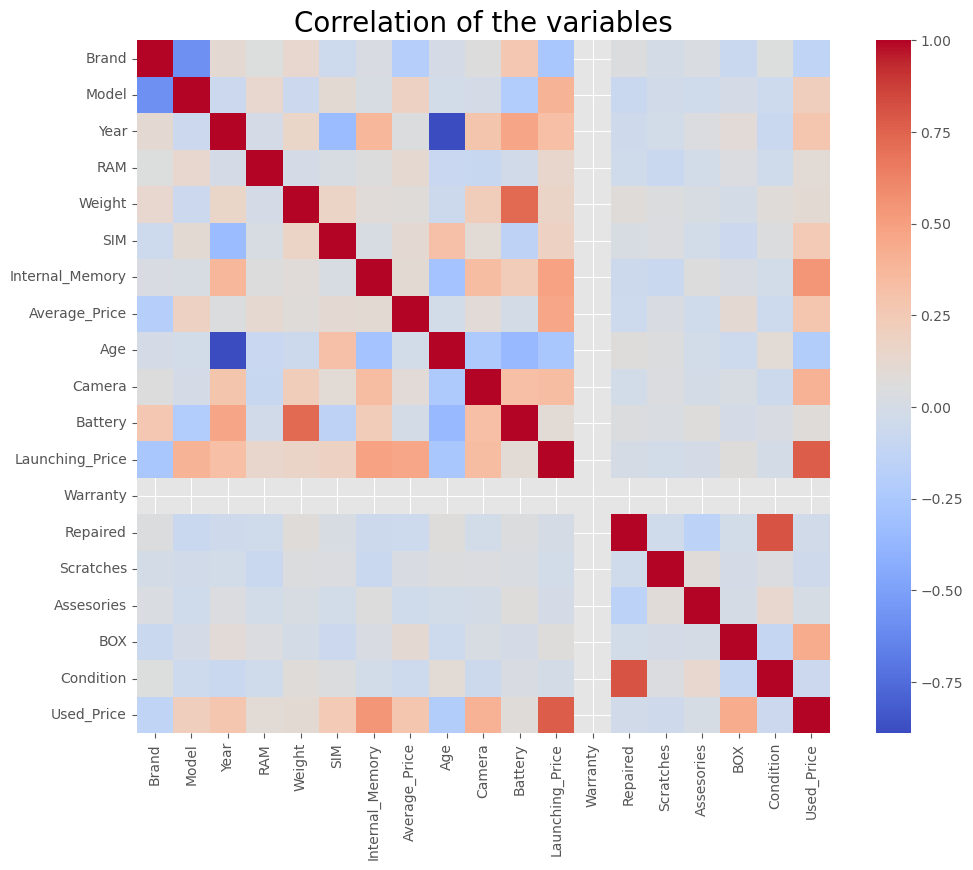

In [17]:
# Plotting correlation matrix
corrmatrix = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=1.0, square=True, cmap='coolwarm')
plt.title("Correlation of the variables", size=20)
plt.show()

In [18]:
# Define numerical columns for scaling
numerical_columns = ['Year', 'RAM', 'Weight', 'Internal_Memory', 'Age', 'Battery', 
                     'Launching_Price', 'Warranty', 'Repaired', 'Scratches', 
                     'Assesories', 'BOX', 'Condition']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
scaled_features = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)

# Add the target variable 'Used_Price' and the encoded categorical variables back to the scaled DataFrame
df_scaled['Used_Price'] = df['Used_Price']
df_scaled = pd.concat([df_scaled, df.drop(columns=numerical_columns + ['Used_Price'])], axis=1)

# Split the data into training and testing sets
X = df_scaled.drop(columns=['Used_Price'])
y = df_scaled['Used_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the scaled and split data
X_train.head(), X_test.head(), y_train.head(), y_test.head()


(         Year       RAM    Weight  Internal_Memory       Age   Battery  \
 66  -0.124455 -0.182787 -0.038256        -0.855866  0.642981  0.927232   
 277 -0.659243  5.538070  0.096261        -0.530322  0.138363 -0.714682   
 234 -0.659243 -0.182787 -0.249641        -0.855866  0.138363  0.183542   
 31  -0.659243 -0.182405  0.249996         0.120766  0.138363 -0.038600   
 84  -1.194030 -0.182977  3.305468        -1.100024  1.652217  0.927232   
 
      Launching_Price  Warranty  Repaired  Scratches  Assesories       BOX  \
 66         -0.898038       0.0 -1.066739  -0.986269    0.995402 -0.946148   
 277         0.324357       0.0 -1.066739   1.013922    0.995402  1.056917   
 234        -1.072666       0.0  0.937437  -0.986269   -1.004619 -0.946148   
 31          1.721379       0.0  0.937437  -0.986269   -1.004619  1.056917   
 84         -1.072666       0.0  0.937437   1.013922   -1.004619  1.056917   
 
      Condition  Brand  Model  SIM  Average_Price  Camera  
 66    0.753022   

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train the models and evaluate their performance
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R2 Score': r2, 'MAE': mae, 'RMSE': rmse}

# Display the results
results

{'Linear Regression': {'MSE': 7610.847598065267,
  'R2 Score': 0.8187653039278304,
  'MAE': 55.682509315791904,
  'RMSE': 87.24017192821933},
 'Decision Tree': {'MSE': 435.0948275862069,
  'R2 Score': 0.989639225089699,
  'MAE': 9.775862068965518,
  'RMSE': 20.858926808112802},
 'Random Forest': {'MSE': 585.9040844827587,
  'R2 Score': 0.9860480521636422,
  'MAE': 11.95862068965517,
  'RMSE': 24.205455675999133},
 'Gradient Boosting': {'MSE': 338.01681290570883,
  'R2 Score': 0.9919509130139694,
  'MAE': 9.079106125112725,
  'RMSE': 18.385233555919513}}

In [20]:
import pickle

# The best model based on RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]

# Print the best model's name and its evaluation metrics
print(f"Best Model: {best_model_name}")
print(f"Evaluation Metrics: {results[best_model_name]}")

# Save the best model as a pickle file
model_path = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
pickle.dump(best_model, open(model_path, "wb"))

print(f"Model saved to {model_path}")


Best Model: Gradient Boosting
Evaluation Metrics: {'MSE': 338.01681290570883, 'R2 Score': 0.9919509130139694, 'MAE': 9.079106125112725, 'RMSE': 18.385233555919513}
Model saved to gradient_boosting_model.pkl
